# <center> EE4708: Data Analytics Laboratory </center>


## <center> Assignment 1: Linear Regression </center>

## <center> Submitted by: Gautham Govind A, EE19B022 </center>
                          

### Importing the necessary packages

In [1]:
import numpy as np                                 # Numpy for mathematical manipulations
import pandas as pd                                # Pandas for data handling and manipulation
from sklearn.linear_model import LinearRegression  # Scikit learn for performing linear regression
from sklearn.metrics import mean_squared_error     # Scikit learn for mean square error calculation
from sklearn.metrics import r2_score               # Scikit learn for R2 score calculation

import re                                          # Regular expressions for string searching

import statsmodels.api as sm                       # Statsmodels for statistical analysis  

import matplotlib.pyplot as plt                    # Matplotlib for plotting
import seaborn as sns                              # Seaborn for plotting

In [2]:
plt.rcParams.update({'font.size': 15})

###  Reading in the data

Data is stored in a .xlsx file. For ease of processing, the file will be read in as a "Dataframe" using the Pandas library. This enables us to make use of the multitude of functions provided by the Pandas library.

It is assumed that the dataset is located in the same directory as this ipynb file.

In [3]:
# Openpyxl is a required package for pandas to open excel files.

!pip install openpyxl

In [3]:
#The first column of the given excel file can be used as the index column

df = pd.read_excel("merged_data.xlsx", index_col = 0)

### Data preprocessing and cleaning

Basic information regarding data:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3134 entries, 0 to 3133
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              3134 non-null   object 
 1   AreaName           3134 non-null   object 
 2   All_Poverty        3134 non-null   int64  
 3   M_Poverty          3134 non-null   int64  
 4   F_Poverty          3134 non-null   int64  
 5   FIPS               3134 non-null   int64  
 6   Med_Income         3133 non-null   float64
 7   Med_Income_White   3132 non-null   float64
 8   Med_Income_Black   1924 non-null   float64
 9   Med_Income_Nat_Am  1474 non-null   float64
 10  Med_Income_Asian   1377 non-null   float64
 11  Hispanic           2453 non-null   float64
 12  M_With             3134 non-null   int64  
 13  M_Without          3134 non-null   int64  
 14  F_With             3134 non-null   int64  
 15  F_Without          3134 non-null   int64  
 16  All_With           3134 

The task at hand is to examine the effect of socioeconomic status on cancer incidence and mortality at a <b> national level </b>. Hence, the particular state/county from which a particular datapoint is obtained is not of relevance to us.

We can therefore safely discard columns "State", "AreaName", "FIPS", "fips_x" and "fips_y".

In [5]:
df = df.drop(columns = ["State", "AreaName", "FIPS", "fips_x", "fips_y"])

Next, we observe that the incidence rate, avg annual incidence, mortality rate and avg annuual deaths are all marked as having "object" dataype. This is an indication that not all values in these columns are numerical. This will present a problem during mathematical analyses. Hence, it is essential to examine these columns and try to make all values numerical or categorical.

Let's check the unique values which appear on the column "Incidence_Rate":

In [6]:
df['Incidence_Rate'].unique()

array(['*', 61.5, 62.7, 58.1, 35.1, 64.9, 88.3, 74.7, 69.7, 103.6, 153.4,
       67.6, 44, 76.8, 66.1, 58.3, 74.9, 66.9, 74.6, 86.4, 65.8, 84.2,
       75.4, 82.4, 73.9, 49.2, 69.5, 83.3, 71.5, 75.9, 73.5, 82.6, 83,
       69.6, 76.7, 76.2, 60.8, 78.1, 75.5, 81.9, 77.3, 72.4, 90.3, 87.9,
       71, 66.5, 70.8, 80.9, 65.1, 80.4, 69.3, 88.1, 59.4, 73.4, 57.6,
       57.9, 64.8, 61.6, 74.2, 79.4, 62.3, 61, 83.1, 65.6, 61.8, 78.7,
       57.1, 55.5, 74, 70.5, 72.3, 98.3, 74.8, 73.2, 90.8, 85.9, 77, 85.6,
       56.4, 67.7, 86.3, 82.5, 59.1, 76.4, 71.6, 108.7, 83.6, 77.5, 72,
       75, 79.1, 75.6, 82.2, 79.2, 77.1, 64.7, 80.6, 96.1, 89.2, 60.6,
       94.2, 96.2, 82.3, 55.9, 104.4, 97.5, 97.2, 98.1, 102.7, 57, 63.4,
       79.5, 87, 91.9, 67.8, 82.7, 81.2, 73.6, 89.5, 67.5, 69.2, 63.9, 84,
       98.8, 87.8, 114, 67.1, 89, 68, 83.9, 65.2, 91.5, 72.1, 78.2, 70.4,
       89.3, 91.2, 108.5, 22.9, 46.9, 36.7, 54.3, 45.5, 64, 54.4, 52.2,
       76.6, 39.6, 50.9, 36.1, 51.9, 48, 46, 58.7, 61.4, 

It can be seen that there are 3 categories of non-numerical values:

- '*' : this indicates that the incidence rate is very low
- strings ending with # : these are probably just numerical values with the # introduced as a noise. These datapoints can be used after removing the #
- '_ ' and '__ ' : this probably indicates that the data is unavailable

We will first deal with the case where data is unavailable:

In [7]:
df[(df['Incidence_Rate'] == '__') | (df['Incidence_Rate'] == '_')]

,All_Poverty,M_Poverty,F_Poverty,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,recent_trend,Mortality_Rate,Avg_Ann_Deaths
882,2257,957,1300,38698.0,39505.0,38482.0,20833.0,NaN,39500.0,5602,779,5754,741,11356,1520,_,_,_,52.2,10
883,1362,668,694,40696.0,40370.0,NaN,81200.0,NaN,NaN,3391,487,3407,509,6798,996,_,_,_,50.6,6
884,2970,1310,1660,43581.0,44353.0,22375.0,NaN,NaN,NaN,6755,1145,7594,963,14349,2108,_,_,_,51.1,10
885,511,245,266,51811.0,51658.0,NaN,NaN,NaN,65938.0,2170,220,2078,261,4248,481,_,_,_,56,4
886,4261,1840,2421,44013.0,45325.0,22326.0,18958.0,NaN,22247.0,11051,2075,12159,1703,23210,3778,_,_,_,45.5,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,832,350,482,45230.0,46528.0,NaN,NaN,NaN,41071.0,1995,525,1846,413,3841,938,__,__,__,61,4
1971,293,134,159,64832.0,66161.0,NaN,18438.0,NaN,NaN,1493,376,1826,210,3319,586,__,__,__,*,*
1972,65248,30454,34794,52870.0,54480.0,30773.0,42183.0,56760.0,41422.0,176960,39625,183055,32403,360015,72028,__,__,__,41.7,182
1973,987,381,606,57122.0,58096.0,NaN,52548.0,NaN,68333.0,3873,526,3532,731,7405,1257,__,__,__,46.1,6


In [8]:
df[(df['Incidence_Rate'] == '__') | (df['Incidence_Rate'] == '_')].shape

(209, 20)

Only 209/3134 entires lack incidence data. Since this is just 6%, we can just drop these columns.

In [9]:
df = df.drop(df[(df['Incidence_Rate'] == '__') | (df['Incidence_Rate'] == '_')].index)

In [10]:
df['Incidence_Rate'].unique()

array(['*', 61.5, 62.7, 58.1, 35.1, 64.9, 88.3, 74.7, 69.7, 103.6, 153.4,
       67.6, 44, 76.8, 66.1, 58.3, 74.9, 66.9, 74.6, 86.4, 65.8, 84.2,
       75.4, 82.4, 73.9, 49.2, 69.5, 83.3, 71.5, 75.9, 73.5, 82.6, 83,
       69.6, 76.7, 76.2, 60.8, 78.1, 75.5, 81.9, 77.3, 72.4, 90.3, 87.9,
       71, 66.5, 70.8, 80.9, 65.1, 80.4, 69.3, 88.1, 59.4, 73.4, 57.6,
       57.9, 64.8, 61.6, 74.2, 79.4, 62.3, 61, 83.1, 65.6, 61.8, 78.7,
       57.1, 55.5, 74, 70.5, 72.3, 98.3, 74.8, 73.2, 90.8, 85.9, 77, 85.6,
       56.4, 67.7, 86.3, 82.5, 59.1, 76.4, 71.6, 108.7, 83.6, 77.5, 72,
       75, 79.1, 75.6, 82.2, 79.2, 77.1, 64.7, 80.6, 96.1, 89.2, 60.6,
       94.2, 96.2, 82.3, 55.9, 104.4, 97.5, 97.2, 98.1, 102.7, 57, 63.4,
       79.5, 87, 91.9, 67.8, 82.7, 81.2, 73.6, 89.5, 67.5, 69.2, 63.9, 84,
       98.8, 87.8, 114, 67.1, 89, 68, 83.9, 65.2, 91.5, 72.1, 78.2, 70.4,
       89.3, 91.2, 108.5, 22.9, 46.9, 36.7, 54.3, 45.5, 64, 54.4, 52.2,
       76.6, 39.6, 50.9, 36.1, 51.9, 48, 46, 58.7, 61.4, 

Next, we deal with values ending with #.

In [11]:
hash_indices = np.array(df[df.Incidence_Rate.str.contains("#$", na = False)].index)



In [12]:
df.loc[hash_indices, 'Incidence_Rate'] = df.loc[hash_indices, 'Incidence_Rate'].str[:-2]

In [13]:
df['Incidence_Rate'].unique()

array(['*', 61.5, 62.7, 58.1, 35.1, 64.9, 88.3, 74.7, 69.7, 103.6, 153.4,
       67.6, 44, 76.8, 66.1, 58.3, 74.9, 66.9, 74.6, 86.4, 65.8, 84.2,
       75.4, 82.4, 73.9, 49.2, 69.5, 83.3, 71.5, 75.9, 73.5, 82.6, 83,
       69.6, 76.7, 76.2, 60.8, 78.1, 75.5, 81.9, 77.3, 72.4, 90.3, 87.9,
       71, 66.5, 70.8, 80.9, 65.1, 80.4, 69.3, 88.1, 59.4, 73.4, 57.6,
       57.9, 64.8, 61.6, 74.2, 79.4, 62.3, 61, 83.1, 65.6, 61.8, 78.7,
       57.1, 55.5, 74, 70.5, 72.3, 98.3, 74.8, 73.2, 90.8, 85.9, 77, 85.6,
       56.4, 67.7, 86.3, 82.5, 59.1, 76.4, 71.6, 108.7, 83.6, 77.5, 72,
       75, 79.1, 75.6, 82.2, 79.2, 77.1, 64.7, 80.6, 96.1, 89.2, 60.6,
       94.2, 96.2, 82.3, 55.9, 104.4, 97.5, 97.2, 98.1, 102.7, 57, 63.4,
       79.5, 87, 91.9, 67.8, 82.7, 81.2, 73.6, 89.5, 67.5, 69.2, 63.9, 84,
       98.8, 87.8, 114, 67.1, 89, 68, 83.9, 65.2, 91.5, 72.1, 78.2, 70.4,
       89.3, 91.2, 108.5, 22.9, 46.9, 36.7, 54.3, 45.5, 64, 54.4, 52.2,
       76.6, 39.6, 50.9, 36.1, 51.9, 48, 46, 58.7, 61.4, 

Finally, we deal with *.

In [14]:
star_indices = df[df['Incidence_Rate'] == '*' ].index

Since * represents very low incidence rate, we just replace it with 0.

In [15]:
star_indices

Int64Index([   0,    1,    4,    5,    6,    8,   13,   21,  181,  225,
            ...
            2784, 2785, 2786, 2788, 2797, 2842, 2913, 2956, 3124, 3128],
           dtype='int64', length=211)

In [16]:
df = df.drop(star_indices)

In [17]:
#df.loc[star_indices, 'Incidence_Rate'] = 0


In [18]:
#df.loc[star_indices]

In [19]:
df['Incidence_Rate'].unique()

array([61.5, 62.7, 58.1, 35.1, 64.9, 88.3, 74.7, 69.7, 103.6, 153.4, 67.6,
       44, 76.8, 66.1, 58.3, 74.9, 66.9, 74.6, 86.4, 65.8, 84.2, 75.4,
       82.4, 73.9, 49.2, 69.5, 83.3, 71.5, 75.9, 73.5, 82.6, 83, 69.6,
       76.7, 76.2, 60.8, 78.1, 75.5, 81.9, 77.3, 72.4, 90.3, 87.9, 71,
       66.5, 70.8, 80.9, 65.1, 80.4, 69.3, 88.1, 59.4, 73.4, 57.6, 57.9,
       64.8, 61.6, 74.2, 79.4, 62.3, 61, 83.1, 65.6, 61.8, 78.7, 57.1,
       55.5, 74, 70.5, 72.3, 98.3, 74.8, 73.2, 90.8, 85.9, 77, 85.6, 56.4,
       67.7, 86.3, 82.5, 59.1, 76.4, 71.6, 108.7, 83.6, 77.5, 72, 75,
       79.1, 75.6, 82.2, 79.2, 77.1, 64.7, 80.6, 96.1, 89.2, 60.6, 94.2,
       96.2, 82.3, 55.9, 104.4, 97.5, 97.2, 98.1, 102.7, 57, 63.4, 79.5,
       87, 91.9, 67.8, 82.7, 81.2, 73.6, 89.5, 67.5, 69.2, 63.9, 84, 98.8,
       87.8, 114, 67.1, 89, 68, 83.9, 65.2, 91.5, 72.1, 78.2, 70.4, 89.3,
       91.2, 108.5, 22.9, 46.9, 36.7, 54.3, 45.5, 64, 54.4, 52.2, 76.6,
       39.6, 50.9, 36.1, 51.9, 48, 46, 58.7, 61.4, 52.3,

Finally, we typecast everything into float:

In [20]:
df['Incidence_Rate'] = df['Incidence_Rate'].astype('float')

Let's take a look at the current dataframe:

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2714 entries, 2 to 3133
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   All_Poverty        2714 non-null   int64  
 1   M_Poverty          2714 non-null   int64  
 2   F_Poverty          2714 non-null   int64  
 3   Med_Income         2714 non-null   float64
 4   Med_Income_White   2714 non-null   float64
 5   Med_Income_Black   1836 non-null   float64
 6   Med_Income_Nat_Am  1324 non-null   float64
 7   Med_Income_Asian   1289 non-null   float64
 8   Hispanic           2168 non-null   float64
 9   M_With             2714 non-null   int64  
 10  M_Without          2714 non-null   int64  
 11  F_With             2714 non-null   int64  
 12  F_Without          2714 non-null   int64  
 13  All_With           2714 non-null   int64  
 14  All_Without        2714 non-null   int64  
 15  Incidence_Rate     2714 non-null   float64
 16  Avg_Ann_Incidence  2714 

Next, we look at Avg_Ann_Incidence:

In [22]:
df['Avg_Ann_Incidence'].unique()

array([131, 6, 36, 9, 39, 12, 7, 51, 3, 4, 5, 43, 170, 25, 23, 17, 120,
       34, 32, 10, 16, 14, 57, 44, 11, 73, 66, 110, 19, 28, 35, 88, 58,
       482, 87, 37, 71, 69, 8, 15, 236, 33, 90, 347, 144, 116, 18, 22, 24,
       47, 72, 108, 74, 41, 135, 89, 31, 21, 129, 13, 26, 38, 56, 78, 121,
       45, 84, 29, 27, 62, 30, 59, 277, 20, 100, 46, 119, 81, 52, 2059,
       280, 628, 201, 203, 115, 687, 169, 554, 411, 86, 371, 54, 70, 3701,
       76, 145, 163, 92, 75, 1326, 222, 1031, 793, 807, 1485, 459, 353,
       161, 375, 189, 705, 99, 154, 246, 288, 273, 174, 344, 182, 253, 94,
       264, 282, 262, 124, 102, 101, 571, 662, 160, 718, 224, 98, 351,
       147, 387, 239, 185, 647, 1129, 233, 244, 268, 77, 685, 281, 241,
       155, 895, 180, 400, 651, 130, 67, 328, 493, 177, 1310, 83, 153, 48,
       588, 1183, 552, 1032, 631, 106, 166, 479, 53, 568, 55, 91, 134, 50,
       183, 341, 311, 431, 96, 42, 148, 49, 61, 79, 107, 550, 80, 152,
       309, 191, 68, 3359, 63, 529, 266, 379, 11

We see a label named '3 or fewer'. We just consider this to be 0 for all practical purposes.

In [23]:
few_indices = df[df['Avg_Ann_Incidence'] == '3 or fewer'].index
df.loc[few_indices, 'Avg_Ann_Incidence'] = 0

In [24]:
df['Avg_Ann_Incidence'] = df['Avg_Ann_Incidence'].astype('float')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2714 entries, 2 to 3133
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   All_Poverty        2714 non-null   int64  
 1   M_Poverty          2714 non-null   int64  
 2   F_Poverty          2714 non-null   int64  
 3   Med_Income         2714 non-null   float64
 4   Med_Income_White   2714 non-null   float64
 5   Med_Income_Black   1836 non-null   float64
 6   Med_Income_Nat_Am  1324 non-null   float64
 7   Med_Income_Asian   1289 non-null   float64
 8   Hispanic           2168 non-null   float64
 9   M_With             2714 non-null   int64  
 10  M_Without          2714 non-null   int64  
 11  F_With             2714 non-null   int64  
 12  F_Without          2714 non-null   int64  
 13  All_With           2714 non-null   int64  
 14  All_Without        2714 non-null   int64  
 15  Incidence_Rate     2714 non-null   float64
 16  Avg_Ann_Incidence  2714 

Next up is the column of recent_trend.

In [26]:
df['recent_trend'].unique()

array(['stable', '*', 'falling', 'rising'], dtype=object)

Clearly, this is a categorical variable. We will define it as such using Pandas.

In [27]:
df['recent_trend'] = df['recent_trend'].astype(dtype = 'category')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2714 entries, 2 to 3133
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   All_Poverty        2714 non-null   int64   
 1   M_Poverty          2714 non-null   int64   
 2   F_Poverty          2714 non-null   int64   
 3   Med_Income         2714 non-null   float64 
 4   Med_Income_White   2714 non-null   float64 
 5   Med_Income_Black   1836 non-null   float64 
 6   Med_Income_Nat_Am  1324 non-null   float64 
 7   Med_Income_Asian   1289 non-null   float64 
 8   Hispanic           2168 non-null   float64 
 9   M_With             2714 non-null   int64   
 10  M_Without          2714 non-null   int64   
 11  F_With             2714 non-null   int64   
 12  F_Without          2714 non-null   int64   
 13  All_With           2714 non-null   int64   
 14  All_Without        2714 non-null   int64   
 15  Incidence_Rate     2714 non-null   float64 
 16  Avg_An

Next, we analyze the mortality rate column.


In [29]:
df['Mortality_Rate'].unique()

array([47.3, 58.3, 54, 34.4, 50.1, 70.8, 76.2, 53.9, 96.1, 124.9, '*',
       39.6, 60.8, 59.3, 48, 61.3, 67.8, 59.9, 29.7, 52.6, 63.1, 66, 43,
       43.9, 69.1, 59.7, 55.1, 61.2, 60.2, 68.9, 71.9, 61.4, 63.6, 65.3,
       56.3, 66.1, 67, 67.7, 65.8, 71.2, 34.5, 57.8, 56.1, 64, 51.5, 72.2,
       56.8, 70, 57.1, 55.9, 44, 41.1, 50.4, 51.9, 51.7, 66.6, 63.3, 52.9,
       49.9, 60.5, 60.3, 57.5, 47.2, 58.5, 65, 51, 61, 54.5, 54.4, 79.8,
       61.7, 69.9, 58.6, 64.3, 47, 62.6, 68.3, 70.2, 47.7, 53.3, 80.1,
       70.5, 49.2, 61.8, 75.7, 74, 62.8, 66.9, 70.1, 51.3, 62.5, 69.6,
       55.6, 75.3, 83.1, 48.4, 83.5, 67.3, 67.9, 76.8, 82.3, 61.9, 59,
       56.6, 70.4, 72.3, 72.5, 73.1, 70.9, 76.1, 64.9, 55.8, 78.5, 90.8,
       63.5, 103.5, 71.7, 54.7, 52, 65.9, 62.1, 60.4, 58.2, 71.6, 52.7,
       76, 17.7, 37, 25.6, 43.8, 33.8, 41.8, 37.7, 37.2, 59.1, 31, 37.3,
       33.6, 23.1, 38.1, 30.9, 33.4, 46, 40.2, 48.9, 36.1, 34.3, 36.2,
       42.7, 27, 36.5, 41.4, 56, 31.1, 43.3, 42.1, 34.8, 3

As before, we set the values conatining * to zero.

In [30]:
mortality_star_indices = df[df['Mortality_Rate'] == '*' ].index
df = df.drop(mortality_star_indices)

In [31]:
df['Mortality_Rate'] = df['Mortality_Rate'].astype('float')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2641 entries, 2 to 3133
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   All_Poverty        2641 non-null   int64   
 1   M_Poverty          2641 non-null   int64   
 2   F_Poverty          2641 non-null   int64   
 3   Med_Income         2641 non-null   float64 
 4   Med_Income_White   2641 non-null   float64 
 5   Med_Income_Black   1819 non-null   float64 
 6   Med_Income_Nat_Am  1296 non-null   float64 
 7   Med_Income_Asian   1279 non-null   float64 
 8   Hispanic           2128 non-null   float64 
 9   M_With             2641 non-null   int64   
 10  M_Without          2641 non-null   int64   
 11  F_With             2641 non-null   int64   
 12  F_Without          2641 non-null   int64   
 13  All_With           2641 non-null   int64   
 14  All_Without        2641 non-null   int64   
 15  Incidence_Rate     2641 non-null   float64 
 16  Avg_An

Finally, we deal with the column containing averge annual deaths.

In [33]:
df['Avg_Ann_Deaths'].unique()

array([96, 5, 31, 8, 28, 9, 6, 37, 3, 4, 34, 121, 20, 17, 43, 15, 86, 29,
       21, 13, 12, 33, 46, 11, 39, 63, 55, 32, 90, 14, 25, 27, 69, 381,
       71, 66, 51, 10, 179, 23, 75, 289, 16, 117, 88, 18, 38, 61, 100, 24,
       54, 106, 7, 19, 48, 36, 95, 58, 22, 49, 223, 85, 91, 65, 26, 42,
       1463, 216, 35, 464, 146, 151, 74, 495, 126, 404, 79, 291, 270, 53,
       2876, 70, 50, 979, 154, 808, 595, 625, 1097, 324, 277, 120, 254,
       134, 472, 119, 186, 200, 40, 145, 250, 60, 133, 177, 196, 92, 77,
       76, 365, 439, 99, 467, 142, 62, 240, 105, 171, 114, 139, 487, 827,
       175, 194, 465, 211, 183, 110, 616, 143, 279, 441, 98, 236, 347,
       124, 885, 57, 424, 102, 852, 422, 777, 423, 78, 107, 213, 104, 366,
       187, 41, 84, 30, 59, 298, 81, 72, 113, 47, 64, 377, 56, 233, 68,
       136, 73, 2369, 362, 193, 257, 129, 101, 165, 45, 281, 198, 163, 80,
       111, 545, 52, 157, 122, 44, 512, 67, 159, 199, 262, 185, 135, 326,
       390, 271, 713, 354, 292, 471, 131, 263, 

Again, we set * = 0.

In [34]:
death_star_indices = df[df['Avg_Ann_Deaths'] == '*' ].index
df.loc[death_star_indices, 'Avg_Ann_Deaths'] = 0

In [35]:
df['Avg_Ann_Deaths'] = df['Avg_Ann_Deaths'].astype('float')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2641 entries, 2 to 3133
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   All_Poverty        2641 non-null   int64   
 1   M_Poverty          2641 non-null   int64   
 2   F_Poverty          2641 non-null   int64   
 3   Med_Income         2641 non-null   float64 
 4   Med_Income_White   2641 non-null   float64 
 5   Med_Income_Black   1819 non-null   float64 
 6   Med_Income_Nat_Am  1296 non-null   float64 
 7   Med_Income_Asian   1279 non-null   float64 
 8   Hispanic           2128 non-null   float64 
 9   M_With             2641 non-null   int64   
 10  M_Without          2641 non-null   int64   
 11  F_With             2641 non-null   int64   
 12  F_Without          2641 non-null   int64   
 13  All_With           2641 non-null   int64   
 14  All_Without        2641 non-null   int64   
 15  Incidence_Rate     2641 non-null   float64 
 16  Avg_An

In [37]:
df.reset_index(inplace = True)
df = df.drop(['index'], axis = 1)

Med_Income is a variable which is important to us for numerical analyses. Hence, we drop the row where it is NaN, since it is only one row.

In [38]:
df.drop(labels = np.argmax(df['Med_Income'].isnull()), axis = 0, inplace = True)

In [39]:
df.reset_index(inplace = True)
df = df.drop(['index'], axis = 1)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   All_Poverty        2640 non-null   int64   
 1   M_Poverty          2640 non-null   int64   
 2   F_Poverty          2640 non-null   int64   
 3   Med_Income         2640 non-null   float64 
 4   Med_Income_White   2640 non-null   float64 
 5   Med_Income_Black   1818 non-null   float64 
 6   Med_Income_Nat_Am  1295 non-null   float64 
 7   Med_Income_Asian   1278 non-null   float64 
 8   Hispanic           2127 non-null   float64 
 9   M_With             2640 non-null   int64   
 10  M_Without          2640 non-null   int64   
 11  F_With             2640 non-null   int64   
 12  F_Without          2640 non-null   int64   
 13  All_With           2640 non-null   int64   
 14  All_Without        2640 non-null   int64   
 15  Incidence_Rate     2640 non-null   float64 
 16  Avg_An

With that, all variables are either numerical or categorical which makes it easy for us to apply various mathematical tools. 

### Exploratory Data Analysis

The overarching goal of the assignment is to see if there is any correlation between socioeconomic status and cancer incidence/ death.

Towards this, let us first try to make some qualitative observations through various plots. This will give insights which can be later used to make quantitaive anlyses.

For most of the plots, we require numerical variables exclusively. Let us make a dataframe containing just the numerical variables:

In [41]:
numerical_df = df.loc[:, df.columns != 'recent_trend']

Let us first plot a correlation heatmap to get a sense of the correlations of the variables involved:

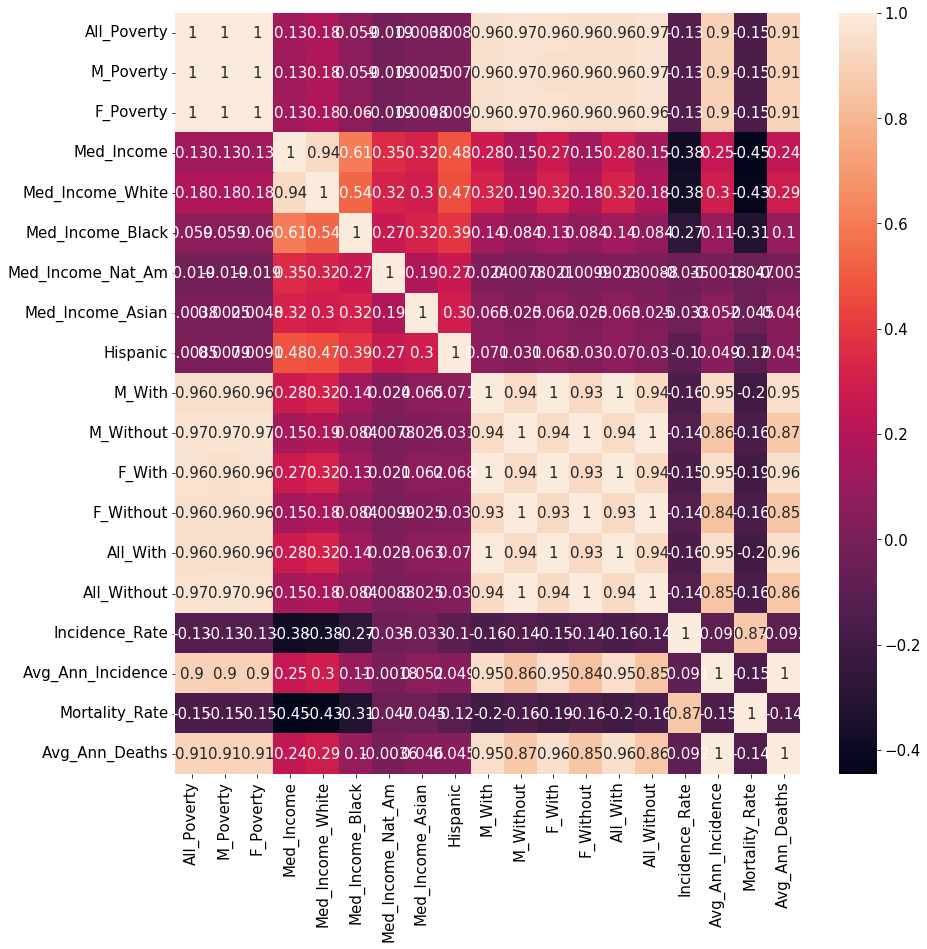

In [42]:
plt.figure(figsize = (14, 14))
sns.heatmap(numerical_df.corr(), annot = True)

Our objective is to see the impact of the following two factors on cancer incidence and mortality:
- Economic status
- Social status

We first focus on the first task, i.e., to see how economic status may be related to cancer incidence and mortality.

From the available dataset, we make the following observations:
- The variables we have with respect to the economic status are the following:
    - Number of individuals below poverty line
    - Median income of individuals
- We expect a positive correlation between incidence/mortality rate and poverty rate, whereas we expect a negative correlation between median income and incidence/mortality rate.

Before, we set out to compute the relationships, it is important to understand the difference between the features Incidence_Rate and Avg_Ann_Incidence and between Mortality_Rate and Avg_Ann_Deaths.

Avg_Ann quantites represent <b> the numbers for the entire population </b>, whereas Incidence_Rate and Mortality_Rate represent <b> the numbers normalized using the total population </b>.

Since what is of relevance to us is the per capita rate, <b> we shall be considering only Incidence_Rate and Mortality_Rate </b>. 

From the heatmap, we see that <b> correlation between All_Poverty and Incidence_Rate is -0.027 which is almost 0! </b> Does this mean there is no correlation between the two?

The important fact to note here is that All_Poverty is the total number of individuals below the poverty line, i.e. <b>it has not been normalized with total population, </b> whereas Incidence_Rate is already normalized. Hence, it is neccessary to normalize this quantity as well with respect to total population.

We can approximate the total population as the sum of all people with health insurance and all people without health insurance. We also calculate male and female population separately(to be used later):

In [43]:
df.insert(loc = 0, column = 'All_Population', value = df['All_With'] + df['All_Without'])
df.insert(loc = 1, column = 'M_Population', value = df['M_With'] + df['M_Without'])
df.insert(loc = 2, column = 'F_Population', value = df['F_With'] + df['F_Without'])

Calculating the poverty rate per 100000 individuals:

In [44]:
df.insert(loc = 3, column = 'All_Poverty_Rate', value = df['All_Poverty']*100000/df['All_Population'])
df.insert(loc = 4, column = 'M_Poverty_Rate', value = df['M_Poverty']*100000/df['M_Population'])
df.insert(loc = 5, column = 'F_Poverty_Rate', value = df['F_Poverty']*100000/df['F_Population'])

Removing absolute values since they are not of relevance:

In [45]:
df.drop(['All_Poverty', 'M_Poverty', 'F_Poverty'], axis = 1, inplace = True)

Now let us compute the correlation again:

In [47]:
df['All_Poverty_Rate'].corr(df['Incidence_Rate'])

0.32655282122113316

We see a significant positive correlation just like we expected! Let us visualize this through a plot:

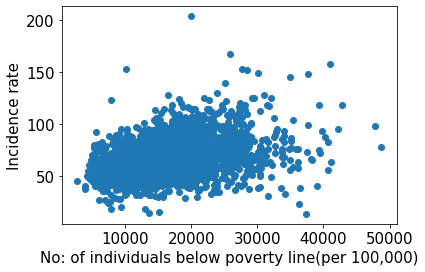

In [46]:
plt.scatter(df['All_Poverty_Rate'], df['Incidence_Rate'])
plt.xlabel("No: of individuals below poverty line(per 100,000)")
plt.ylabel("Incidence rate")
plt.savefig("Images/inc_pov.png", bbox_inches = 'tight')

We see a general positive correlation in the plot as well.

We repeat for Mortality_Rate:

In [47]:
df['All_Poverty_Rate'].corr(df['Mortality_Rate'])

0.383232743132219

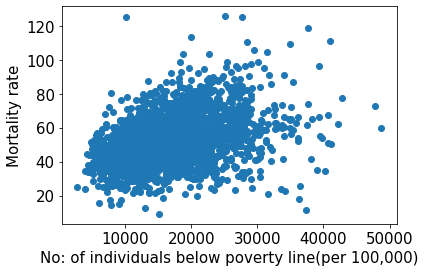

In [48]:
plt.scatter(df['All_Poverty_Rate'], df['Mortality_Rate'])
plt.xlabel("No: of individuals below poverty line(per 100,000)")
plt.ylabel("Mortality rate")
plt.savefig("Images/mor_pov.png", bbox_inches = 'tight')

We see a general positive correlation here as well.

Next, we examine Median Income feature. 

In [49]:
df['Med_Income'].corr(df['Incidence_Rate'])

-0.3798052589148917

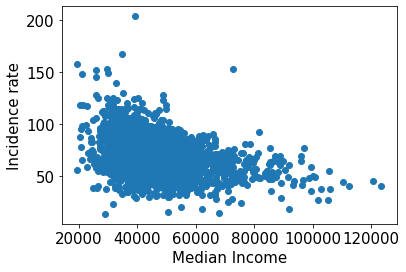

In [50]:
plt.scatter(df['Med_Income'], df['Incidence_Rate'])
plt.xlabel("Median Income")
plt.ylabel("Incidence rate")
plt.savefig("Images/inc_med.png", bbox_inches = 'tight')

In [53]:
df['Med_Income'].corr(df['Mortality_Rate'])

-0.4452826102906732

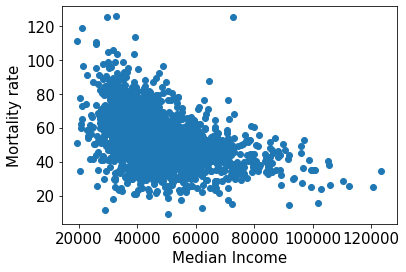

In [51]:
plt.scatter(df['Med_Income'], df['Mortality_Rate'])
plt.xlabel("Median Income")
plt.ylabel("Mortality rate")
plt.savefig("Images/mor_med.png", bbox_inches = 'tight')

<b> From the correlation values and plots, it can be qualitatively concluded that as poverty increases/ income decreases, there is a higher chance for cancer incidence/mortality in general. </b>

Let us also explore the effect of having health insurance on our target parameters. For this, like in the previous case it is necessary to compute the per capita values:

In [52]:
df.insert(loc = 12, column = 'All_Insurance_Rate', value = df['All_With']/df['All_Population'])
df.insert(loc = 13, column = 'M_Insurance_Rate', value = df['M_With']/df['M_Population'])
df.insert(loc = 14, column = 'F_Insurance_Rate', value = df['F_With']/df['F_Population'])

In [53]:
df.columns

Index(['All_Population', 'M_Population', 'F_Population', 'All_Poverty_Rate',
       'M_Poverty_Rate', 'F_Poverty_Rate', 'Med_Income', 'Med_Income_White',
       'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic',
       'All_Insurance_Rate', 'M_Insurance_Rate', 'F_Insurance_Rate', 'M_With',
       'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without',
       'Incidence_Rate', 'Avg_Ann_Incidence', 'recent_trend', 'Mortality_Rate',
       'Avg_Ann_Deaths'],
      dtype='object')

In [54]:
df['All_Insurance_Rate']

0       0.743959
1       0.868101
2       0.854663
3       0.787795
4       0.812350
          ...   
2635    0.865122
2636    0.831483
2637    0.859531
2638    0.830681
2639    0.886759
Name: All_Insurance_Rate, Length: 2640, dtype: float64

In [55]:
df['All_Insurance_Rate'].corr(df['Incidence_Rate'])

-0.03851140101570041

It seems like there isn't any correlation at all between cancer incidence and having a health insurance. This is to be expected because a health insurance is of use only in the treatment of a disease; not so much for its prevention.

In [56]:
df['All_Insurance_Rate'].corr(df['Mortality_Rate'])

-0.12415643020283608

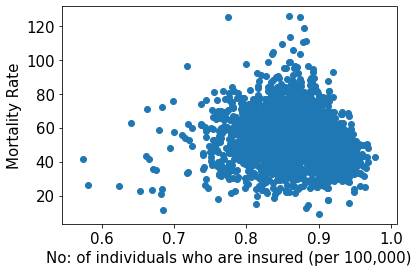

In [57]:
plt.scatter(df['All_Insurance_Rate'], df['Mortality_Rate'])
plt.xlabel("No: of individuals who are insured (per 100,000)")
plt.ylabel("Mortality Rate")
plt.savefig("Images/ins_mort.png", bbox_inches = 'tight')

Unlike the case of cancer incidence, there seems to be a <b> significant negative correlation </b> between having a health insurance and mortality rate. Again, this is to be expected since having a health insurance provides an incentive to idnividuals to seek appropriate treatment without considering financial limitations.

Next, out target is to associate social status with cancer incidence/ mortality.

Towards this, we shall consider the following two broad social classification criterion:
- Gender
- Ethnicity

The major challenge we face is that we <b >do not have direct access to incidence/mortality rate for each section separately. </b> For instance, we do not know the separate count of male individuals having cancer incidence and female individuals having cancer incidence. This prohibits any direct comparison.

As a result, it is necessary to make an <b> indirect comparison </b> based on the available parameters.

We first consider gender. With respect to gender we have the following available parameters:
- Poverty rate for males and females separately
- Rate of individuals having life insurance for males and females separately

Since we have already conculed from earlier analysis that poverty rate has a positive correlation with both incidence rate and mortality rate, if we can conclude that one section has a higher poverty rate in general, we can conclude that this section suffers from higher incidence/mortality as well.

Let us make box plots for the two sections:

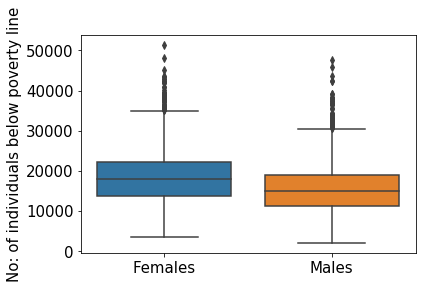

In [58]:
classes = ['Females', 'Males']

ax = sns.boxplot(data = df[["F_Poverty_Rate", "M_Poverty_Rate"]])
ax.set_ylabel("No: of individuals below poverty line")
ax.set_xticklabels(classes)
plt.savefig("Images/box_pov.png", bbox_inches = 'tight')

From the plot, it seems that the <b>poverty rate is higher for the female population</b>, atleast qualitatively. To see this quantitatively, consider:

In [59]:
df[["F_Poverty_Rate", "M_Poverty_Rate"]].describe()

,F_Poverty_Rate,M_Poverty_Rate
count,2640.000000,2640.000000
mean,18438.267600,15449.460381
std,6671.494646,6015.827048
min,3422.382671,1972.637607
25%,13757.330077,11153.223760
50%,17891.631556,14869.535936
75%,22205.200648,18859.267008
max,51264.842540,47576.177285


As can be seen, both <b>mean and median poverty rate is  higher for the female population.</b> Hence, from this, it can be concluded that female population in general has higher poverty rate and consequently <b>higher values for cancer incidence and mortality rate.</b>

For health insurance:

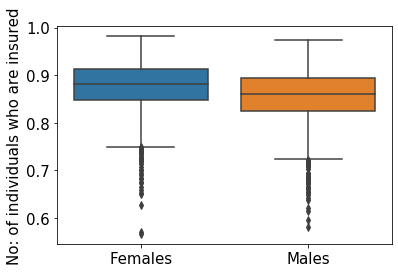

In [60]:
ax = sns.boxplot(data = df[["F_Insurance_Rate", "M_Insurance_Rate"]])
ax.set_ylabel("No: of individuals who are insured")
ax.set_xticklabels(classes)
plt.savefig("Images/box_ins.png", bbox_inches = 'tight')

Next, we explore the relationship between ethnicity and cancer incidence/mortality.  

In this case, the parameter available to us in median income. As we have seen before, a lower medican income would correspond to higher cancer incidence/mortality.

Let us see how the median incomes for different ethnic sections are distributed:

In [62]:
ethnic_cols = ['Med_Income','Med_Income_White', 'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic']

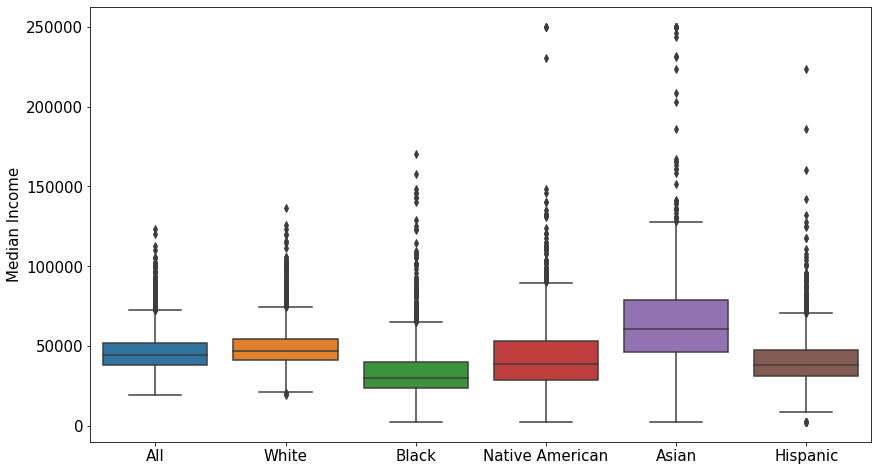

In [63]:
ethnic = ['All', 'White', 'Black', 'Native American', 'Asian', 'Hispanic']

plt.figure(figsize = (14, 8))
ax = sns.boxplot(data = df[ethnic_cols])
ax.set_ylabel("Median Income")
ax.set_xticklabels(ethnic)
plt.savefig('Images/box_ethnic.png', bbox_inches = 'tight')

It can be seen that the median income of different sections are different, with some sections having higher values and others having lower. 

Quantitavely:

In [64]:
df[ethnic_cols].describe()

,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic
count,2640.000000,2640.000000,1818.000000,1295.000000,1278.000000,2127.000000
mean,46542.398485,49386.191667,34708.625413,43468.138224,65998.231612,41039.206394
std,12529.141437,12713.167597,18087.803105,24197.024884,34411.305663,16272.038982
min,19328.000000,19340.000000,2499.000000,2499.000000,2499.000000,2499.000000
25%,38226.250000,41175.250000,23835.000000,28969.000000,46340.500000,31591.500000
50%,44497.000000,47043.500000,29983.500000,39028.000000,60516.000000,38198.000000
75%,51993.250000,54484.750000,40337.250000,53190.500000,79002.000000,47282.500000
max,123453.000000,136311.000000,170195.000000,250001.000000,250001.000000,223750.000000


It can be seen that both the mean and median of the median income follow the following order for ethnic groups:

<b> Asians > Whites > Native Americans > Hispanics > Blacks</b>

From our previous discussion, it is reasonable to assume that the incidence rate/mortality rate might also vary accordingly.

<b> Incidence v/s Mortality

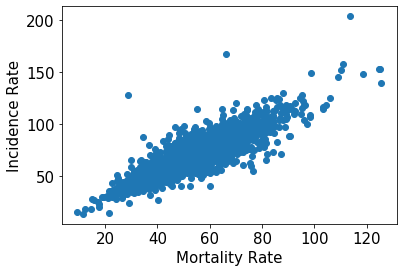

In [66]:
plt.scatter(df['Mortality_Rate'], df['Incidence_Rate'])
plt.xlabel("Mortality Rate")
plt.ylabel("Incidence Rate")
plt.savefig('Images/inc_mort.png', bbox_inches = 'tight')

In [67]:
df[['Mortality_Rate', 'Incidence_Rate']].corr()

,Mortality_Rate,Incidence_Rate
Mortality_Rate,1.000000,0.866983
Incidence_Rate,0.866983,1.000000


### Applying Linear Regression

To formally validate the observations we made during EDA, we apply linear regression.

<b> Model 1: Using only poverty rate </b>

We train a linear regression model which uses only poverty rate to predict the incidence/mortality rate. The error of this model can then be used as an indicator of how good of a predictor the poverty rate is.

In [68]:
arr_poverty = np.array(df['All_Poverty_Rate'])
arr_incidence = np.array(df['Incidence_Rate'])
                         
poverty_reg = LinearRegression().fit(arr_poverty.reshape(-1, 1), arr_incidence)
poverty_predictions = poverty_reg.predict(arr_poverty.reshape(-1, 1))

In [69]:
poverty_reg.coef_

array([0.00092112])

In [71]:
arr_incidence.shape

(2640,)

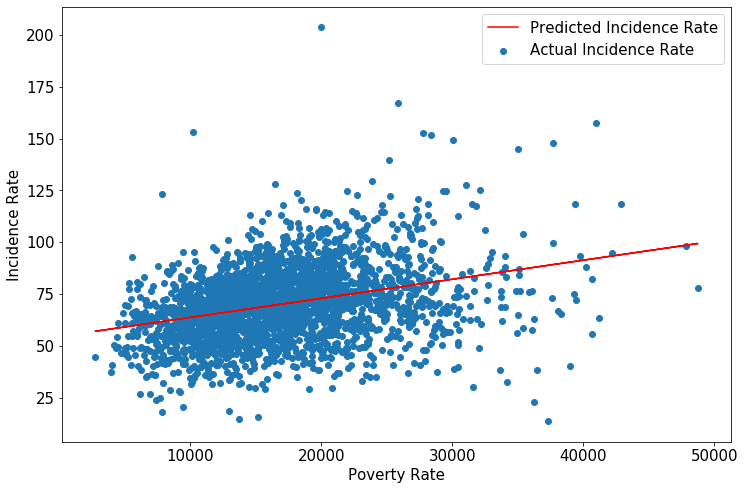

In [70]:
plt.figure(figsize = (12,8))
plt.plot(arr_poverty, poverty_predictions.reshape(-1), 'r', label = "Predicted Incidence Rate")
plt.scatter(arr_poverty, arr_incidence, label = "Actual Incidence Rate")
plt.xlabel('Poverty Rate')
plt.ylabel('Incidence Rate')
plt.legend()
plt.savefig("Images/m1_inc.png", bbox_inches = 'tight')

In [73]:
mse = mean_squared_error(poverty_predictions, arr_incidence)
mse

279.3972894574652

In [74]:
poverty_r2 = r2_score(arr_incidence, poverty_predictions)
poverty_r2

0.10663674504748122

In [73]:
arr_poverty = np.array(df['All_Poverty_Rate'])
arr_mortality = np.array(df['Mortality_Rate'])
                         
poverty_mor_reg = LinearRegression().fit(arr_poverty.reshape(-1, 1), arr_mortality)
poverty_mor_predictions = poverty_mor_reg.predict(arr_poverty.reshape(-1, 1))

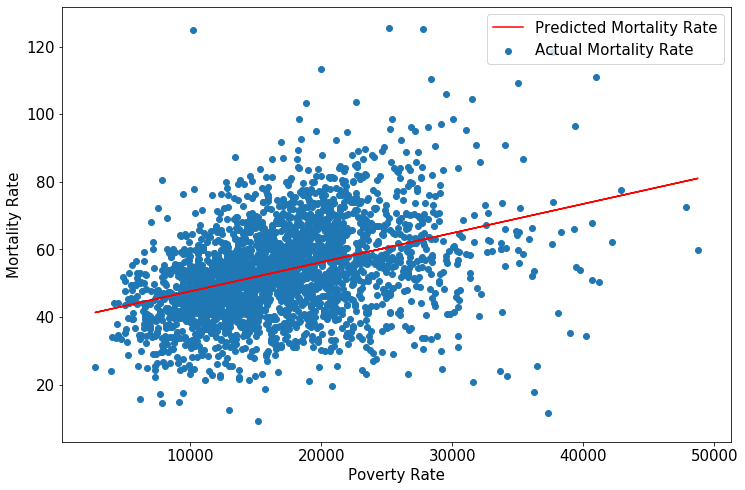

In [74]:
plt.figure(figsize = (12,8))
plt.plot(arr_poverty, poverty_mor_predictions.reshape(-1), 'r', label = "Predicted Mortality Rate")
plt.scatter(arr_poverty, arr_mortality, label = "Actual Mortality Rate")
plt.xlabel('Poverty Rate')
plt.ylabel('Mortality Rate')
plt.legend(loc = 'upper right')
plt.savefig("Images/m1_mor.png", bbox_inches = 'tight')

In [75]:
mse_pov_mor = mean_squared_error(poverty_mor_predictions, arr_mortality)
print(mse_pov_mor)
poverty_mor_r2 = r2_score(arr_mortality, poverty_mor_predictions)
print(poverty_mor_r2)

169.96783516143543
0.14686733540864527


<b> Model 2: Using only median income </b>

In [76]:
arr_income = np.array(df['Med_Income'])
                         
income_reg = LinearRegression().fit(arr_income.reshape(-1, 1), arr_incidence)
income_predictions = income_reg.predict(arr_income.reshape(-1, 1))

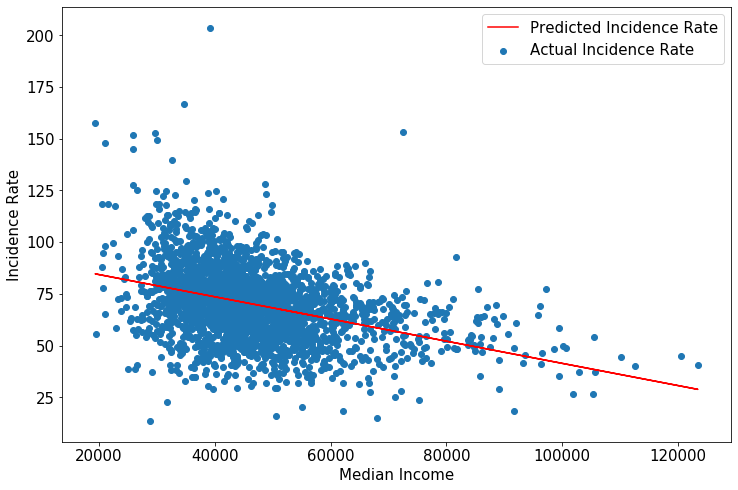

In [77]:
plt.figure(figsize = (12,8))
plt.plot(arr_income, income_predictions, 'r', label = "Predicted Incidence Rate")
plt.scatter(arr_income, arr_incidence, label = "Actual Incidence Rate")
plt.xlabel("Median Income")
plt.ylabel("Incidence Rate")
plt.legend()
plt.savefig("Images/m2_inc.png", bbox_inches = 'tight')

In [78]:
income_mse = mean_squared_error(income_predictions, arr_incidence)
income_mse

267.633194714768

In [79]:
income_r2 = r2_score(arr_incidence, income_predictions)
income_r2

0.14425203469940784

In [80]:
arr_income = np.array(df['Med_Income'])
                         
income_mor_reg = LinearRegression().fit(arr_income.reshape(-1, 1), arr_mortality)
income_mor_predictions = income_mor_reg.predict(arr_income.reshape(-1, 1))

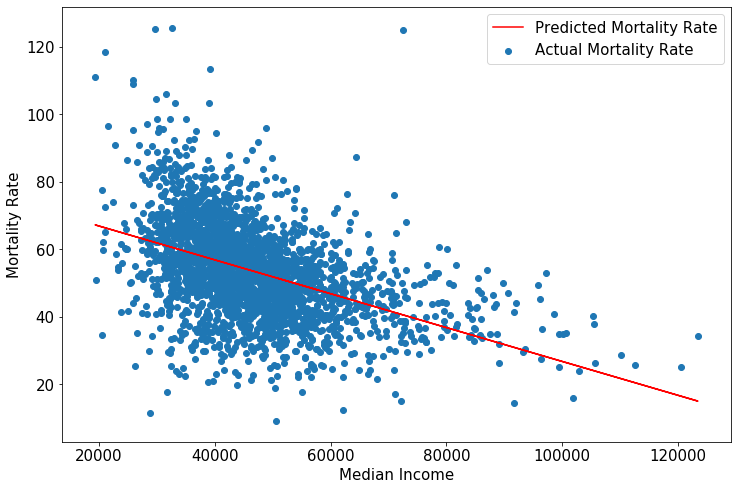

In [81]:
plt.figure(figsize = (12,8))
plt.plot(arr_income, income_mor_predictions, 'r', label = "Predicted Mortality Rate")
plt.scatter(arr_income, arr_mortality, label = "Actual Mortality Rate")
plt.xlabel("Median Income")
plt.ylabel("Mortality Rate")
plt.legend()
plt.savefig("Images/m2_mor.png", bbox_inches = 'tight')

In [82]:
mse_inc_mor = mean_squared_error(income_mor_predictions, arr_mortality)
print(mse_inc_mor)
inc_mor_r2 = r2_score(arr_mortality, income_mor_predictions)
print(inc_mor_r2)

159.72567437327845
0.19827660302727546


<b> Model 3: Using both poverty rate and median income </b>

In [83]:
arr_joint = np.array(df[['All_Poverty_Rate', 'Med_Income']])

joint_reg = LinearRegression().fit(arr_joint, arr_incidence.reshape(-1, 1))
joint_predictions = joint_reg.predict(arr_joint)

In [84]:
arr_joint.shape

(2640, 2)

In [85]:
arr_incidence.shape

(2640,)

In [86]:
len(joint_predictions)

2640

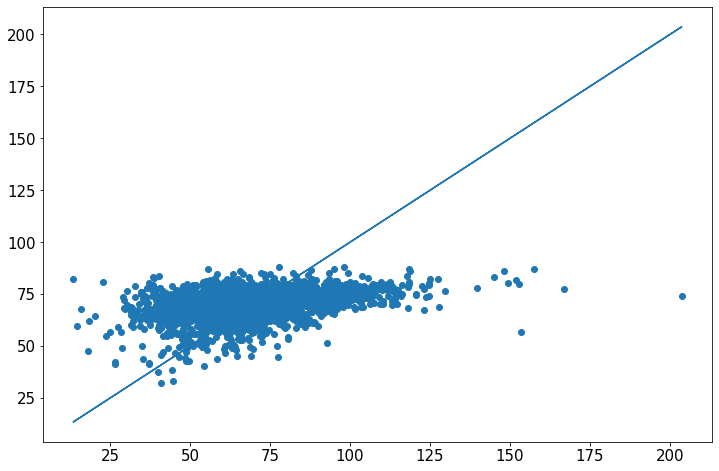

In [87]:
plt.figure(figsize = (12,8))
plt.scatter(arr_incidence, joint_predictions)
plt.plot(arr_incidence, arr_incidence)

In [88]:
joint_mse = mean_squared_error(joint_predictions, arr_incidence)
joint_mse

267.0321542028284

In [89]:
joint_r2 = r2_score(arr_incidence, joint_predictions)
joint_r2

0.14617384113191612

In [90]:
arr_joint = np.array(df[['All_Poverty_Rate', 'Med_Income']])

joint_mor_reg = LinearRegression().fit(arr_joint, arr_mortality.reshape(-1, 1))
joint_mor_predictions = joint_mor_reg.predict(arr_joint)

In [91]:
joint_mor_mse = mean_squared_error(joint_mor_predictions, arr_mortality)
print(joint_mor_mse)

joint_mor_r2 = r2_score(arr_mortality, joint_mor_predictions)
print(joint_mor_r2)

159.1865591066743
0.20098262586673232


In [92]:
from sklearn.preprocessing import PolynomialFeatures

In [93]:
poly = PolynomialFeatures(6)
new_feat = poly.fit_transform(arr_joint)

In [94]:
poly_reg = LinearRegression().fit(new_feat, arr_incidence.reshape(-1, 1))
poly_predictions = poly_reg.predict(new_feat)

In [95]:
poly_mse = mean_squared_error(poly_predictions, arr_incidence)
poly_mse

249.67449718229315

In [96]:
poly_r2 = r2_score(arr_incidence, poly_predictions)
poly_r2

0.20167435441293535

In [97]:
poly_mor_reg = LinearRegression().fit(new_feat, arr_mortality.reshape(-1, 1))
poly_mor_predictions = poly_mor_reg.predict(new_feat)

In [98]:
poly_mor_mse = mean_squared_error(poly_mor_predictions, arr_mortality)
print(poly_mor_mse)
poly_mor_r2 = r2_score(arr_mortality, poly_mor_predictions)
print(poly_mor_r2)

146.29212012418927
0.26570467799553454


### Statistical Analysis of the models

#### Model 1

In [71]:
X = df['All_Poverty_Rate']
y = df['Incidence_Rate']

x = sm.add_constant(X)
result = sm.OLS(y,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         Incidence_Rate   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     314.9
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           1.21e-66
Time:                        10:17:14   Log-Likelihood:                -11181.
No. Observations:                2640   AIC:                         2.237e+04
Df Residuals:                    2638   BIC:                         2.238e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               54.4634      0.939  

In [99]:
X = df['All_Poverty_Rate']
y = df['Mortality_Rate']

x = sm.add_constant(X)
result = sm.OLS(y,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     454.1
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           4.15e-93
Time:                        10:48:41   Log-Likelihood:                -10525.
No. Observations:                2640   AIC:                         2.105e+04
Df Residuals:                    2638   BIC:                         2.107e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               38.9472      0.733  

#### Model 2

In [102]:
X = df['Med_Income']
y = df['Incidence_Rate']

x = sm.add_constant(X)
result = sm.OLS(y,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         Incidence_Rate   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     444.7
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           2.37e-91
Time:                        10:50:53   Log-Likelihood:                -11124.
No. Observations:                2640   AIC:                         2.225e+04
Df Residuals:                    2638   BIC:                         2.226e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.0546      1.226     77.561      0.0

In [103]:
X = df['Med_Income']
y = df['Mortality_Rate']

x = sm.add_constant(X)
result = sm.OLS(y,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     652.4
Date:                Wed, 16 Nov 2022   Prob (F-statistic):          8.92e-129
Time:                        10:51:26   Log-Likelihood:                -10443.
No. Observations:                2640   AIC:                         2.089e+04
Df Residuals:                    2638   BIC:                         2.090e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.9444      0.947     81.270      0.0

#### Model 3

In [104]:
X = df[['All_Poverty_Rate', 'Med_Income']]
y = df['Incidence_Rate']

x = sm.add_constant(X)
result = sm.OLS(y,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         Incidence_Rate   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     225.7
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           3.24e-91
Time:                        10:53:02   Log-Likelihood:                -11121.
No. Observations:                2640   AIC:                         2.225e+04
Df Residuals:                    2637   BIC:                         2.227e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               87.9420      3.166  

In [105]:
X = df[['All_Poverty_Rate', 'Med_Income']]
y = df['Mortality_Rate']

x = sm.add_constant(X)
result = sm.OLS(y,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     331.7
Date:                Wed, 16 Nov 2022   Prob (F-statistic):          3.31e-129
Time:                        10:55:57   Log-Likelihood:                -10438.
No. Observations:                2640   AIC:                         2.088e+04
Df Residuals:                    2637   BIC:                         2.090e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               70.2082      2.444  